In [2]:
# import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [8]:
# đọc dữ liệu
df = pd.read_excel('house_price_dống-da.xlsx')
df.head()

d:\Anaconda\Anaconda_Setup\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long
0,Bán nhà Trần Quang Diệu mới coong đẹp 50m2x6 t...,"Đường Trần Quang Diệu, Phường Trung Liệt, Đốn...",50.0,14700.0,2021-01-01,Sổ đỏ,NaN,NaN,4.0,6.0,6.0,Bán nhà riêng\n,Đường Trần Quang Diệu,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.015698,105.824583
1,Bán nhà mặt phố Tây Sơn - 6 tầng. Kinh doanh t...,"Đường Tây Sơn, Phường Trung Liệt, Đống Đa, Hà...",35.0,12500.0,2021-02-19,Sổ đỏ,NaN,NaN,NaN,NaN,6.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.008930,105.824105
2,Bán nhà số 36 Đoàn Kết - phố Khâm Thiên - Đống...,"Số 36 Đoàn Kết, Phố Khâm Thiên, Phường Thổ Qu...",57.0,4200.0,2021-03-10,Sổ đỏ,Nam,Nam,3.0,8.0,4.0,Bán nhà riêng\n,Phố Khâm Thiên,Phường Khâm Thiên,Quận Đống Đa,Thành phố Hà Nội,21.025208,105.833111
3,Bán nhà 6 tầng mới kinh doanh mặt ngõ 1194 Đườ...,"Ngõ 1194, Đường Láng, Phường Láng Thượng, Đố...",62.0,11000.0,2021-03-13,Sổ đỏ,Đông,Đông-Nam,6.0,5.0,6.0,Bán nhà riêng\n,Đường Láng Thượng,Phường Láng Thượng,Quận Đống Đa,Thành phố Hà Nội,21.025379,105.801011
4,"Bán nhà mặt phố Thái Hà 70m2, 5 tầng, 4.5m mặt...","Phố Thái Hà, Phường Trung Liệt, Đống Đa, Hà Nội",70.0,36000.0,2021-03-13,Sổ đỏ,NaN,NaN,NaN,6.0,5.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.009239,105.824230


#### Vẽ biểu đồ so sánh phân phối giá (triệu đ/m2) giữa nhà Phố và Nhà ngõ

In [9]:
# tiền xử lý dữ liệu
df.dropna(subset=['area', 'price'], inplace=True)
values = {'land_certificate': "Không có"}
df.fillna(value=values, inplace=True)
df['million/m^2'] = df['area'] * df['price']

<AxesSubplot:xlabel='type_of_land', ylabel='million/m^2'>

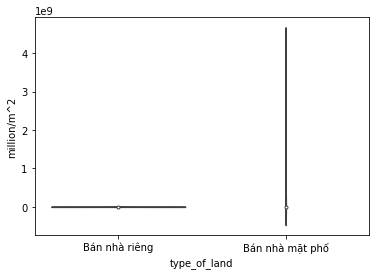

In [10]:
# Vẽ biểu đồ so sánh phân phối giá (triệu đ/m2) giữa nhà Phố và Nhà ngõ
df1 = df[['type_of_land', 'million/m^2']]
df1 = df1.loc[(df.type_of_land.isin(['Bán nhà riêng', 'Bán nhà mặt phố']))]  
sns.violinplot(x='type_of_land', y='million/m^2', data=df1)

#### Kiểm định giả thuyết giá (triệu đ/m2) nhà mặt phố cao hơn giá nhà trong ngõ với mức ý nghĩa 5%

In [ ]:
# Giả thuyết H0: n2 - n1 = 0
# Giả thuyết H1: n2 - n1 > 0

In [11]:
df11 = df1[(df1['type_of_land'] == 'Bán nhà riêng')]
df12 = df1[(df1['type_of_land'] == 'Bán nhà mặt phố')]
print(stats.ttest_ind(df12['million/m^2'], df11['million/m^2'], equal_var=False))

Ttest_indResult(statistic=1.1663385628558214, pvalue=0.2480927044812996)


In [ ]:
# Vì s>0, p>5% nên ta chấp nhận H0 và bác bỏ H1
# Kết luận : không đủ căn cứ để kết luận nhà mặt phố cao hơn giá nhà trong ngõ

#### Giá của những căn nhà không có thông tin về giấy tờ pháp lý thấp hơn giá nhà những căn có thông tin về giấy tờ pháp lý với mức ý nghĩa 5%

In [ ]:
# Giả thuyết H0: n2 - n1 == 0
# Giả thuyết H1: n2 - n1 < 0

In [13]:
df2 = df[['land_certificate', 'million/m^2']]
df21 = df2[(df2['land_certificate'])=='Sổ đỏ']
df22 = df2[(df2['land_certificate'])=='Không có']
print(stats.ttest_ind(df22['million/m^2'], df21['million/m^2'], equal_var=False))

Ttest_indResult(statistic=0.6227106909597325, pvalue=0.5337825237277198)


In [ ]:
# Vì s>0, p>5% nên ta chấp nhận H0 và bác bỏ H1
 # Kết luận: Không đủ căn cứ để kết luận giá của những căn nhà không có thông tin về giấy tờ pháp lý thấp hơn giá nhà những căn có thông tin về giấy tờ pháp lý.